In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
from modules.constants import *
from modules.SpatialGrid import SpatialGrid
from modules.AtomicOrbital import AtomicOrbital
import matplotlib.pyplot as plt

In [3]:
#Check for the normalization of the atomic orbital
Lx = 8.0; Ly = 8.0; Lz = 8.0
Nx = 80; Ny = 80; Nz = 80
r, dV, _ = SpatialGrid.get_rgrid(Nx, Ny, Nz, Lx, Ly, Lz)
Rc = [0.0, 0.0, 0.0] #Center of the atom
Z = 4.0 #The effective charge of the atom
phi = AtomicOrbital.get_2pz(r, Rc, Z)
print('Norm of the orbital: '+str(np.sum(phi*phi)*dV)+', should be 1 in the infinite volume with fine spatial mecsh')

Norm of the orbital: 0.9999151619443735, should be 1 in the infinite volume with fine spatial mecsh


# The crystal
## The primitive cell vector
$$
\mathbf{a}_1 = a \left(\frac{\sqrt{3}}{2} \hat{x} - \frac{1}{2} \hat{y}\right), \quad
\mathbf{a}_2 = a \left(\frac{\sqrt{3}}{2} \hat{x} + \frac{1}{2} \hat{y}\right)
$$
$\mathbf{a}_1 \cdot \mathbf{a}_1 = \mathbf{a}_2 \cdot \mathbf{a}_2  = a^2, \mathbf{a}_1 \cdot \mathbf{a}_2 = \frac{a^2}{2} $

$$
\mathbf{R}_A = \frac{1}{3} (\mathbf{a}_1 + \mathbf{a}_2) 
=
\frac{a}{\sqrt{3}} \hat{x}, \quad
\mathbf{R}_B = \frac{2}{3} (\mathbf{a}_1 + \mathbf{a}_2)
=
\frac{2a}{\sqrt{3}} \hat{x}
$$

# Tight-binding wth the atomic orbitals for graphene

$$
\phi_{\mathbf{k}} (r)
 = 
c_A \Phi_{A,\mathbf{k}} (\mathbf{r}) +  c_B \Phi_{B,\mathbf{k}} (\mathbf{r}),\\
\Phi_{n,\mathbf{k}} (\mathbf{r})
=
\frac{1}{\sqrt{N_1 N_2}}
\sum_{n_1 = -N_1/2}^{N_1/2-1}\sum_{n_2 = -N_2/2}^{N_2/2-1}e^{\mathrm{i}\mathbf{k}\cdot(n_1 \mathbf{a}_1+ n_2 \mathbf{a}_2)} e^{\mathrm{i}\mathbf{k}\cdot \mathbf{R}_n} \phi_{2pz} (\mathbf{r} -\mathbf{R}_n- (n_1 \mathbf{a}_1+ n_2 \mathbf{a}_2)  ),
$$
where the two-sites in honeycomb structure are labeled as A, and B.
The $\mathbf{R}_n$ refers the relative position of $n$-atom in the PRIMITIVE CELL, summation over differnt primitive cell is acounted for $n_1, n_2$.



In [4]:
# Confirming lattice constant and atomic distance for graphene carbon atoms
print(0.246/Bohr2nm)
print(0.246*np.sqrt(3.0)/3.0/Bohr2nm)

4.648726266579395
2.683943361398497


# Grpahene lattice structure
The lattice vector $\mathbf{a}_1, \mathbf{a}_2$ are given as 
$$
\mathbf{a}_1 = a\left(\frac{\sqrt{3}}{2}\hat{x} + \frac{1}{2}\hat{y}\right), \\
\mathbf{a}_2 = a\left(\frac{\sqrt{3}}{2}\hat{x} - \frac{1}{2}\hat{y}\right)
$$

The distance of two Carbon atoms are given by $d = \frac{\sqrt{3}}{3}a$.

Thus, $d=$ 0.142 nm for $a=$ 0.246 nm, 2.684 Bohr, and 4.6485 Bohr respectively.


In [5]:
# Check of nomarlization 2pz orbital in a large Honeycomb cell
## Generate spatial grids
a = 8.0 #So large cell
Lz = 8.0
N1 = 80
N2 = 80
Nz = 80
r, dV, V, a1, a2, b1, b2 = SpatialGrid.get_rgrid_Honeycomb(N1, N2, Nz, Lz, a=a)
## Determine atomic position and the effective charge
Rc = np.array([0.5*(np.sqrt(3.0)*a), 0.0, 0.0]) #Center of the lattice
print(Rc)
Z = 4.0
## 2pz
phi = AtomicOrbital.get_2pz(r, Rc, Z)
print('max, min = ', np.amax(np.abs(phi)), np.amin(np.abs(phi)))
print('The norm of 2pz orbital', np.sum(phi*phi)*dV, ', should be close to 1 because isolated atom in a large honeycomb cell')


[6.92820323 0.         0.        ]
max, min =  0.5870506526949595 0.0
The norm of 2pz orbital 0.9998614648412059 , should be close to 1 because isolated atom in a large honeycomb cell


# In general
$$
S_{AA}(\mathbf{k})
=
\sum_{\mathbf{T}''} e^{-\mathrm{i}\mathbf{k}\cdot\mathbf{T}''} \int \! \mathrm{d}^3r \ \phi_{2pz} (\mathbf{r}-\mathbf{R}_A ) \phi_{2pz} (\mathbf{r}-\mathbf{R}_A  + \mathbf{T}''), \\
S_{AB}(\mathbf{k})
=
\sum_{\mathbf{T}''} e^{-\mathrm{i}\mathbf{k}\cdot(\mathbf{R}_A - \mathbf{R}_B + \mathbf{T}'') } \int \! \mathrm{d}^3r \ \phi_{2pz} (\mathbf{r}-\mathbf{R}_A ) \phi_{2pz} (\mathbf{r}-\mathbf{R}_B + \mathbf{T}''), 
$$


## Nearest negibhbour
$$
S_{AA}(\mathbf{k})^{(0)}
=
\sum_{\mathbf{T}''=0} e^{-\mathrm{i}\mathbf{k}\cdot\mathbf{T}''} \int \! \mathrm{d}^3r \ \phi_{2pz} (\mathbf{r}-\mathbf{R}_A ) \phi_{2pz} (\mathbf{r}-\mathbf{R}_A  + \mathbf{T}''), \\
=1, \\
S_{AB}(\mathbf{k})^{(0)}
=
\sum_{\mathbf{T}''=\mathbf{0}, +\mathbf{a}_1, +\mathbf{a}_2} e^{-\mathrm{i}\mathbf{k}\cdot(\mathbf{R}_A - \mathbf{R}_B + \mathbf{T}'') } \int \! \mathrm{d}^3r \ \phi_{2pz} (\mathbf{r}-\mathbf{R}_A ) \phi_{2pz} (\mathbf{r}-\mathbf{R}_B + \mathbf{T}'') \\
=
t \left(e^{-\mathrm{i}\mathbf{k}\cdot(\mathbf{R}_A - \mathbf{R}_B) } + e^{-\mathrm{i}\mathbf{k}\cdot(\mathbf{R}_A - \mathbf{R}_B +  \mathbf{a}_1) } + e^{-\mathrm{i}\mathbf{k}\cdot(\mathbf{R}_A - \mathbf{R}_B + \mathbf{a}_2) } \right)  =t f(\mathbf{k}) \\
f(\mathbf{k})
=
 e^{-\mathrm{i}\mathbf{k}\cdot(\mathbf{R}_A - \mathbf{R}_B) } \left(1 + e^{-\mathrm{i}\mathbf{k}  \mathbf{a}_1 } + e^{-\mathrm{i}\mathbf{k}\cdot\mathbf{a}_2  } \right) 
=
e^{+\mathrm{i}\frac{a}{\sqrt{3}}k_x } \left\{ 1 + 2 e^{-\mathrm{i}\frac{\sqrt{3}a}{2}k_x} \cos \left[ \frac{a}{2}k_y \right] \right\} 
$$


# Eq.(3) in NJP 24 (2022) 033051

$$
f(\mathbf{k})
=
\exp \left( \mathrm{i} \frac{k_x a}{\sqrt{3}}\right) + 2  \exp \left( -\mathrm{i} \frac{k_x a}{2\sqrt{3}}\right) \cos \left( \frac{k_y a}{2}\right)
$$

In [6]:
def get_phink(r, Rc, Z, k, phiAO, N1=10, N2=10):
    #phink = (0.0+0.0j)*AtomicOrbital.get_2pz(r, Rc, Z)
    phink = (0.0+0.0j)*get_phiAO(r, Rc, Z)
    for i1 in range(-N1//2, N1//2):
        for i2 in range(-N2//2, N2//2):
            d = Rc[:2] + i1*a1 + i2*a2
            ekx = np.exp(zI*d)
            ekr = np.exp(zI*np.dot(k,d))
            d3D = 1.0*Rc
            d3D[:2] = 1.0*d
            #phink = phink + AtomicOrbital.get_2pz(r, d3D, Z)
            #phink = phink + get_phiAO(r, d3D, Z)
            phink = phink + ekr*get_phiAO(r, d3D, Z)
    phink = phink/np.sqrt(N1*N2)
    return phink, N1, N2
#
a = 4.6485 #Lattice constant for graphene
Lz = 8.0
N1 = 80
N2 = 80
Nz = 80
r, dV, V, a1, a2, b1, b2 = SpatialGrid.get_rgrid_Honeycomb(N1, N2, Nz, Lz, a=a)

Rc = np.array([0.5*(np.sqrt(3.0)*a), 0.0, 0.0]) #The body center of the cell
print(Rc)
Z = 4.0
k = np.array([0.0, 0.0]) #The Gamma point
get_phiAO = AtomicOrbital.get_2pz
phink, N1, N2 = get_phink(r, Rc, Z, k, get_phiAO)
print('The norm of phink orbital', np.sum((np.abs(phink))**2)*dV*(N1*N2))

Rc = np.array([0.0, 0.0, 0.0]) #The origin of the coordinate
print(Rc)
Z = 4.0
k = np.array([0.0, 0.0]) #The Gamma point
get_phiAO = AtomicOrbital.get_2pz
phink, N1, N2 = get_phink(r, Rc, Z, k, get_phiAO)
print('The norm of phink orbital', np.sum((np.abs(phink))**2)*dV*(N1*N2))

Rc = np.array([-0.5*(np.sqrt(3.0)*a), 0.0, 0.0]) #Outside of the cell
print(Rc)
Z = 4.0
k = np.array([0.0, 0.0]) #The Gamma point
get_phiAO = AtomicOrbital.get_2pz
phink, N1, N2 = get_phink(r, Rc, Z, k, get_phiAO)
print('The norm of phink orbital', np.sum((np.abs(phink))**2)*dV*(N1*N2))

print('When these three norms with differnt atom poisitions show the same value, the code seems written well.')

[4.02571909 0.         0.        ]
The norm of phink orbital 1.0543053843417938
[0. 0. 0.]
The norm of phink orbital 1.0543053843415422
[-4.02571909  0.          0.        ]
The norm of phink orbital 1.0543053843349006
When these three norms with differnt atom poisitions show the same value, the code seems written well.


In [7]:
# Checking normalization of $k$-dependent orbital for A- and B-cites
#
a = 4.6485
Z = 4.0
#
Lz = 8.0
N1 = 80
N2 = 80
Nz = 80
r, dV, V, a1, a2, b1, b2 = SpatialGrid.get_rgrid_Honeycomb(N1, N2, Nz, Lz, a=a)
#
k = np.array([0.0, 0.0])
#
RA = np.array([(np.sqrt(3.0)*a)/3.0, 0.0, 0.0])
print(RA)
get_phiAO = AtomicOrbital.get_2pz
phinkA, N1, N2 = get_phink(r, RA, Z, k, get_phiAO)
print('The norm of phink orbital', np.sum((np.abs(phinkA))**2)*dV*(N1*N2))
RB = np.array([2.0*(np.sqrt(3.0)*a)/3.0, 0.0, 0.0])
print(RB)
get_phiAO = AtomicOrbital.get_2pz
phinkB, N1, N2 = get_phink(r, RB, Z, k, get_phiAO)
print('The norm of phink orbital', np.sum((np.abs(phinkB))**2)*dV*(N1*N2))
#
print('The overlap', np.sum(np.conjugate(phinkA)*phinkB)*dV*(N1*N2))

[2.68381273 0.         0.        ]
The norm of phink orbital 1.0543053842219803
[5.36762545 0.         0.        ]
The norm of phink orbital 1.0543053842219876
The overlap (0.40492824586730425+0j)


In [8]:
get_phiAO = AtomicOrbital.get_2pz
Z = 4.0
N2belarge = 4
RA = np.array([(np.sqrt(3.0)*a)/3.0, 0.0, 0.0])
RB = np.array([2.0*(np.sqrt(3.0)*a)/3.0, 0.0, 0.0])
#
k_list = []
kchar_list = []
#
## Gamma
k = np.array([0.0, 0.0])
k_list.append(k)
kchar_list.append('Gamma')
## M
k = 0.5*b1 + 0.5*b2
k_list.append(k)
kchar_list.append('M')
## K
k = (1.0/3.0)*b1 + (2.0/3.0)*b2
k_list.append(k)
kchar_list.append('K')
## K'
k = (2.0/3.0)*b1 + (1.0/3.0)*b2
k_list.append(k)
kchar_list.append('Kprime')
for ik in range(len(k_list)):
    print(kchar_list[ik])
    k = k_list[ik]
    phinkA, N1, N2 = get_phink(r, RA, Z, k, get_phiAO, N1=N2belarge, N2=N2belarge)
    phinkB, N1, N2 = get_phink(r, RB, Z, k, get_phiAO, N1=N2belarge, N2=N2belarge)
    print('The norm of phinkA orbital', np.sum((np.abs(phinkA))**2)*dV*(N1*N2))
    print('The norm of phinkB orbital', np.sum((np.abs(phinkB))**2)*dV*(N1*N2))
    print('The overlap', np.sum(np.conjugate(phinkA)*phinkB)*dV*(N1*N2))

Gamma
The norm of phinkA orbital 1.0541947254823034
The norm of phinkB orbital 1.0542892055281714
The overlap (0.40482990754002024+0j)
M
The norm of phinkA orbital 0.9818671808936505
The norm of phinkB orbital 0.9818460249356429
The overlap (0.061388507618004136-0.10632801419521207j)
K
The norm of phinkA orbital 0.9730908225226961
The norm of phinkB orbital 0.9730868733292959
The overlap (9.560677240898158e-06-1.655957873585448e-05j)
Kprime
The norm of phinkA orbital 0.9730908225226961
The norm of phinkB orbital 0.9730868733292959
The overlap (9.560677240876861e-06-1.6559578735855217e-05j)


0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
Smallest $|S_{AB}|$:  0.029529943282022367
Largest $|S_{AB}|$:  0.40482990754002024


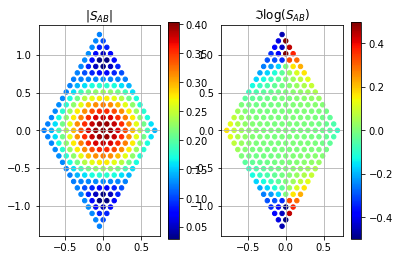

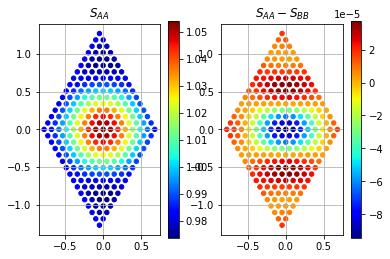

In [9]:
k_list = []
SAA_list = []
SBB_list = []
SAB_list = []
get_phiAO = AtomicOrbital.get_2pz
Z = 4.0
N2belarge = 4
RA = np.array([(np.sqrt(3.0)*a)/3.0, 0.0, 0.0])
RB = np.array([2.0*(np.sqrt(3.0)*a)/3.0, 0.0, 0.0])
#
N1k = 16
N2k = 16
for i1 in range(N1k):
    for i2 in range(N2k):
        k = (i1/N1k - 1/2)*b1 + (i2/N2k - 1/2)*b2
        #k = (i1/N1k)*b1 + (i2/N2k)*b2 
        k_list.append(k)
#
nk = 0
for k in k_list:
      #print(k)
    if (nk%10 ==0):
        print(nk)
    phinkA, N1, N2 = get_phink(r, RA, Z, k, get_phiAO, N1=N2belarge, N2=N2belarge)
    phinkB, N1, N2 = get_phink(r, RB, Z, k, get_phiAO, N1=N2belarge, N2=N2belarge)
    SAA_list.append(np.sum((np.abs(phinkA))**2)*dV*(N1*N2))
    SBB_list.append(np.sum((np.abs(phinkB))**2)*dV*(N1*N2))
    SAB_list.append(np.sum(np.conjugate(phinkA)*phinkB)*dV*(N1*N2))
    nk += 1
k_array = np.array(k_list)
SAA_array = np.array(SAA_list)
SBB_array = np.array(SBB_list)
SAB_array = np.array(SAB_list)
#
print("Smallest $|S_{AB}|$: ", np.amin(np.abs(SAB_array)))
print("Largest $|S_{AB}|$: ", np.amax(np.abs(SAB_array)))
#

plt.figure()
##
plt.subplot(121)
plt.title('$|S_{AB}|$')
plt.scatter(k_array[:,0], k_array[:,1], s = 5000.0/(N1k*N2k), c=np.abs(SAB_array), cmap=plt.cm.jet)
plt.grid()
plt.colorbar()
plt.axis('scaled')
##
plt.subplot(122)
plt.title('$\Im \log (S_{AB})$')
plt.scatter(k_array[:,0], k_array[:,1], s = 5000.0/(N1k*N2k), c=np.angle(SAB_array)/tpi, cmap=plt.cm.jet)
plt.grid()
plt.colorbar()
plt.axis('scaled')
plt.show()
#
plt.figure()
##
plt.subplot(121)
plt.title('$S_{AA}$')
plt.scatter(k_array[:,0], k_array[:,1], s = 5000.0/(N1k*N2k), c=SAA_array, cmap=plt.cm.jet)
plt.grid()
plt.colorbar()
plt.axis('scaled')
##
plt.subplot(122)
plt.title('$S_{AA} - S_{BB}$')
plt.scatter(k_array[:,0], k_array[:,1], s = 5000.0/(N1k*N2k), c=SAA_array - SBB_array, cmap=plt.cm.jet)
plt.grid()
plt.colorbar()
plt.axis('scaled')
plt.show()

# The 2x2 eigenproblem
$$
\begin{pmatrix}
\epsilon_{2pz} & \gamma f \\
\gamma f^* & \epsilon_{2pz}
\end{pmatrix}
\begin{pmatrix}
 c_{\pm}^A \\
 c_{\pm}^B
\end{pmatrix}
=
\lambda_{\pm}
\begin{pmatrix}
1 & s f \\
s f^* & 1
\end{pmatrix}
\begin{pmatrix}
 c_{\pm}^A \\
 c_{\pm}^B
\end{pmatrix}
$$

$\epsilon_{2pz}$ to be taken to zero.
$$
\lambda_{\pm}
=
\pm \gamma \frac{|f|}{1\pm s|f|}
$$
$$
\begin{pmatrix}
 c_{\pm}^A \\
 c_{\pm}^B
\end{pmatrix}
=
\frac{1}{2(1\pm s|f|)}
\begin{pmatrix}
 1 \\
 \mp f^*/|f|
\end{pmatrix}
$$

$$
\begin{pmatrix}
 c_{\alpha}^A &  c_{\alpha}^B
\end{pmatrix}^\dagger
\begin{pmatrix}
1 & s f \\
s f^* & 1
\end{pmatrix}
\begin{pmatrix}
 c_{\beta}^A \\
 c_{\beta}^B
\end{pmatrix}
=
\delta_{\alpha \beta},
\qquad
\alpha, \beta = +, -
$$

In [10]:
#
def k2fepscAcB(k, a1, a2, RA, RB, gamma, s):
    term1 = np.exp(-zI*np.sum(k*(RA-RB)))
    term2 = 1.0 + np.exp(-zI*np.sum(k*a1)) + np.exp(-zI*np.sum(k*a2))
    #term2 = 1.0 + np.exp(zI*np.sum(k*a1)) + np.exp(zI*np.sum(k*a2))
    f = term1*term2
    fabs = np.abs(f)
    epsplus = +gamma*fabs/(1.0 + s*fabs)
    epsminus = -gamma*fabs/(1.0 - s*fabs)
    cAplus = 1.0/np.sqrt(2.0*(1.0+s*fabs))
    cBplus = (np.conj(f)/fabs)/np.sqrt(2.0*(1.0+s*fabs))
    cAminus = 1.0/np.sqrt(2.0*(1.0-s*fabs))
    cBminus = -(np.conj(f)/fabs)/np.sqrt(2.0*(1.0-s*fabs))
    return f, epsplus, epsminus, cAplus, cBplus, cAminus, cBminus 
gamma = -3.033/Hartree2eV
s = 0.129
k_list = []
kchar_list = []
#Chceck for the norm
## Gamma
k = np.array([0.0, 0.0])
k_list.append(k)
kchar_list.append('Gamma')
## M
k = 0.5*b1 + 0.5*b2
k_list.append(k)
kchar_list.append('M')
## K
k = (1.0/3.0)*b1 + (2.0/3.0)*b2
k_list.append(k)
kchar_list.append('K')
## K'
k = (2.0/3.0)*b1 + (1.0/3.0)*b2
k_list.append(k)
kchar_list.append('Kprime')
for ik in range(len(k_list)):
    print(kchar_list[ik])
    k = k_list[ik]
    f, epsplus, epsminus,  cAplus, cBplus, cAminus, cBminus = k2fepscAcB(k, a1, a2, RA[:2], RB[:2], gamma, s)
    plusnorm = np.conj(cAplus)*cAplus + s*f*np.conj(cAplus)*cBplus + s*np.conj(f)*np.conj(cBplus)*cAplus + np.conj(cBplus)*cBplus
    minusnorm = np.conj(cAminus)*cAminus + s*f*np.conj(cAminus)*cBminus + + s*np.conj(f)*np.conj(cBminus)*cAminus + np.conj(cBminus)*cBminus
    print(plusnorm, minusnorm)
    print(epsplus, epsminus)



Gamma
(0.9999999999999998+0j) (1+0j)
-0.24108297222515124 0.545484636992308
M
(1.0000000000000004-2.3211666433381225e-18j) (1.0000000000000004+5.257341300373346e-18j)
-0.09872514983061255 0.12796865001005922
K
(0.9999999999999998+9.025469129932658e-34j) (1-3.0814879110195774e-33j)
-6.663938374035729e-17 6.66393837403573e-17
Kprime
(0.9999999999999998-2.1789409980263115e-33j) (1+0j)
-6.459742800187834e-17 6.459742800187835e-17


Smallest $|s f|$:  0.03026767444980683
Largest $|s f|$:  0.387


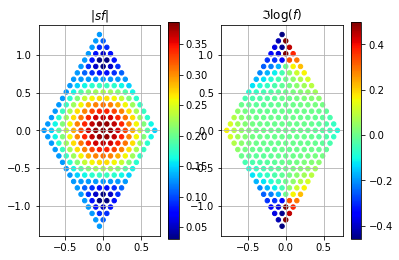

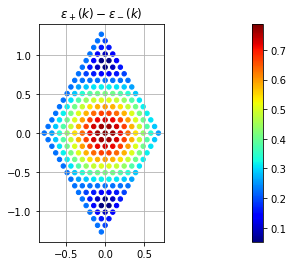

In [11]:
k_list = []
epsplus_list = []
epsminus_list = []
f_list = []
gamma = -3.033/Hartree2eV
s = 0.129
N1k = 16
N2k = 16
for i1 in range(N1k):
    for i2 in range(N2k):
        k = (i1/N1k - 1/2)*b1 + (i2/N2k - 1/2)*b2 
        #k = (i1/N1k)*b1 + (i2/N2k)*b2 
        k_list.append(k)
#
for k in k_list:
    #print(k)
    f, epsplus, epsminus, cAplus, cBplus, cAminus, cBminus = k2fepscAcB(k, a1, a2, RA[:2], RB[:2], gamma, s)
    f_list.append(f)
    epsplus_list.append(epsplus)
    epsminus_list.append(epsminus)
k_array = np.array(k_list)
f_array = np.array(f_list)
epsplus_array = np.array(epsplus_list)
epsminus_array = np.array(epsminus_list)

print("Smallest $|s f|$: ", np.amin(np.abs(s*f_array)))
print("Largest $|s f|$: ", np.amax(np.abs(s*f_array)))

plt.figure()
##
plt.subplot(121)
plt.title('$|sf|$')
plt.scatter(k_array[:,0], k_array[:,1], s = 5000.0/(N1k*N2k), c=np.abs(s*f_array), cmap=plt.cm.jet)
plt.grid()
plt.colorbar()
plt.axis('scaled')
##
plt.subplot(122)
plt.title('$\Im \log(f)$')
plt.scatter(k_array[:,0], k_array[:,1], s = 5000.0/(N1k*N2k), c=np.angle(f_array)/tpi, cmap=plt.cm.jet)
plt.grid()
plt.colorbar()
plt.axis('scaled')
##
plt.show()
#
plt.figure()
plt.title('$\epsilon_+(k) - \epsilon_-(k)$')
plt.scatter(k_array[:,0], k_array[:,1], s = 5000.0/(N1k*N2k), c=(epsminus_array - epsplus_array), cmap=plt.cm.jet)
plt.grid()
plt.colorbar()
plt.axis('scaled')
plt.show()


In [12]:
Z = 4.0
get_phiAO = AtomicOrbital.get_2pz
N2belarge = 4
RA = np.array([(np.sqrt(3.0)*a)/3.0, 0.0, 0.0])
RB = np.array([2.0*(np.sqrt(3.0)*a)/3.0, 0.0, 0.0])
gamma = -3.033/Hartree2eV
s = 0.129
#
k_list = []
kchar_list = []
#
## Gamma
k = np.array([0.0, 0.0])
k_list.append(k)
kchar_list.append('Gamma')
## M
k = 0.5*b1 + 0.5*b2
k_list.append(k)
kchar_list.append('M')
## K
k = (1.0/3.0)*b1 + (2.0/3.0)*b2
k_list.append(k)
kchar_list.append('K')
## K'
k = (2.0/3.0)*b1 + (1.0/3.0)*b2
k_list.append(k)
kchar_list.append('Kprime')
for ik in range(len(k_list)):
    k = k_list[ik]
    print(kchar_list[ik]+': '+str(k))
    f, epsplus, epsminus, cAplus, cBplus, cAminus, cBminus = k2fepscAcB(k, a1, a2, RA[:2], RB[:2], gamma, s)
    phinkA, N1, N2 = get_phink(r, RA, Z, k, get_phiAO, N1=N2belarge, N2=N2belarge)
    phinkB, N1, N2 = get_phink(r, RB, Z, k, get_phiAO, N1=N2belarge, N2=N2belarge)
    psikplus = cAplus*phinkA + cBplus*phinkB
    psikminus = cAminus*phinkA + cBminus*phinkB
    print('The norm of psikplus orbital', np.sum((np.abs(psikplus))**2)*dV*(N1*N2))
    print('The norm of psikminus orbital', np.sum((np.abs(psikminus))**2)*dV*(N1*N2))

Gamma: [0. 0.]
The norm of psikplus orbital 1.0519624174803583
The norm of psikminus orbital 1.059399768295623
M: [0.78038049 0.        ]
The norm of psikplus orbital 0.978417730868605
The norm of psikminus orbital 0.9863141075529721
K: [0.78038049 0.45055289]
The norm of psikplus orbital 0.9730817464332219
The norm of psikminus orbital 0.97309594941877
Kprime: [ 0.78038049 -0.45055289]
The norm of psikplus orbital 0.9730833534452165
The norm of psikminus orbital 0.9730943424067755


0/256 is finished.
50/256 is finished.
100/256 is finished.
150/256 is finished.
200/256 is finished.
250/256 is finished.
Averaged norm for $||\Psi_{+}||$:  1.000099150241307
Averaged norm for $||\Psi_{-}||$:  0.9995769089392696


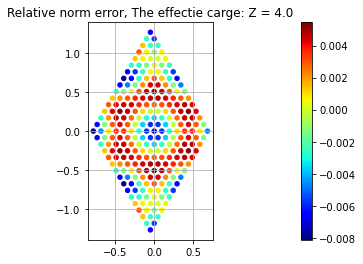

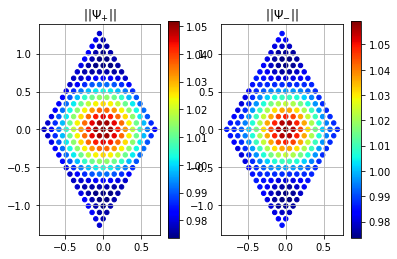

In [13]:
Z = 4.0
get_phiAO = AtomicOrbital.get_2pz
N2belarge = 4
RA = np.array([(np.sqrt(3.0)*a)/3.0, 0.0, 0.0])
RB = np.array([2.0*(np.sqrt(3.0)*a)/3.0, 0.0, 0.0])
gamma = -3.033/Hartree2eV
s = 0.129
#
k_list = []
normkplus_list = []
normkminus_list = []
N1k = 16
N2k = 16
for i1 in range(N1k):
    for i2 in range(N2k):
        k = (i1/N1k - 1/2)*b1 + (i2/N2k - 1/2)*b2
        #k = (i1/N1k)*b1 + (i2/N2k)*b2 
        k_list.append(k)
k_array = np.array(k_list)
#
nk = 0
for k in k_list:
      #print(k)
    if (nk%50 ==0):
        print(str(nk)+"/"+str(len(k_list))+" is finished.")
    f, epsplus, epsminus, cAplus, cBplus, cAminus, cBminus = k2fepscAcB(k, a1, a2, RA[:2], RB[:2], gamma, s)
    f_list.append(f)
    phinkA, N1, N2 = get_phink(r, RA, Z, k, get_phiAO, N1=N2belarge, N2=N2belarge)
    phinkB, N1, N2 = get_phink(r, RB, Z, k, get_phiAO, N1=N2belarge, N2=N2belarge)
    psikplus = cAplus*phinkA + cBplus*phinkB
    psikminus = cAminus*phinkA + cBminus*phinkB
    normkplus = np.sum((np.abs(psikplus))**2)*dV*(N1*N2)
    normkminus = np.sum((np.abs(psikminus))**2)*dV*(N1*N2)
    #print('The norms of psikplus, and psikminus orbital', normkplus, normkminus, (normkplus - normkminus)/(normkplus + normkminus)*2.0)
    normkplus_list.append(normkplus)
    normkminus_list.append(normkminus)
    nk += 1
normkplus_array = np.array(normkplus_list)
normkminus_array = np.array(normkminus_list)
print("Averaged norm for $||\Psi_{+}||$: ",np.sum(normkplus_array)/(N1k*N2k))
print("Averaged norm for $||\Psi_{-}||$: ",np.sum(normkminus_array)/(N1k*N2k))
#
#
plt.figure()
plt.title('Relative norm error, The effectie carge: Z = '+str(Z))
plt.scatter(k_array[:,0], k_array[:,1], s = 5000.0/(N1k*N2k), c=(normkplus_array - normkminus_array)/(normkplus_array + normkminus_array)*2.0, cmap=plt.cm.jet)
plt.grid()
plt.colorbar()
plt.axis('scaled')
plt.show()
#
plt.figure()
##
plt.subplot(121)
plt.title('$||\Psi_{+}||$')
plt.scatter(k_array[:,0], k_array[:,1], s = 5000.0/(N1k*N2k), c=normkplus_array, cmap=plt.cm.jet)
plt.grid()
plt.colorbar()
plt.axis('scaled')
##
plt.subplot(122)
plt.title('$||\Psi_{-}||$')
plt.scatter(k_array[:,0], k_array[:,1], s = 5000.0/(N1k*N2k), c=normkminus_array, cmap=plt.cm.jet)
plt.grid()
plt.colorbar()
plt.axis('scaled')
##
plt.show()

0/256 is finished.
50/256 is finished.
100/256 is finished.
150/256 is finished.
200/256 is finished.
250/256 is finished.
Averaged norm for $||\Psi_{+}||$:  0.9449245294354948
Averaged norm for $||\Psi_{-}||$:  1.0917630246064733


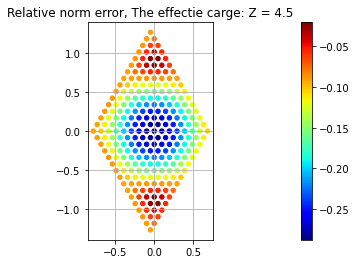

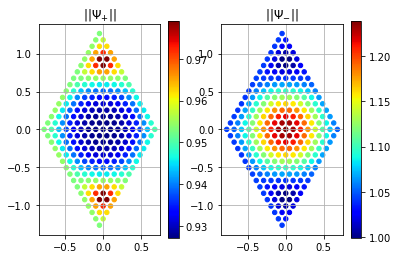

In [14]:
Z = 4.5
get_phiAO = AtomicOrbital.get_2pz
N2belarge = 4
RA = np.array([(np.sqrt(3.0)*a)/3.0, 0.0, 0.0])
RB = np.array([2.0*(np.sqrt(3.0)*a)/3.0, 0.0, 0.0])
gamma = -3.033/Hartree2eV
s = 0.129
#
k_list = []
normkplus_list = []
normkminus_list = []
N1k = 16
N2k = 16
for i1 in range(N1k):
    for i2 in range(N2k):
        k = (i1/N1k - 1/2)*b1 + (i2/N2k - 1/2)*b2
        #k = (i1/N1k)*b1 + (i2/N2k)*b2 
        k_list.append(k)
k_array = np.array(k_list)
#
nk = 0
for k in k_list:
      #print(k)
    if (nk%50 ==0):
        print(str(nk)+"/"+str(len(k_list))+" is finished.")
    f, epsplus, epsminus, cAplus, cBplus, cAminus, cBminus = k2fepscAcB(k, a1, a2, RA[:2], RB[:2], gamma, s)
    f_list.append(f)
    phinkA, N1, N2 = get_phink(r, RA, Z, k, get_phiAO, N1=N2belarge, N2=N2belarge)
    phinkB, N1, N2 = get_phink(r, RB, Z, k, get_phiAO, N1=N2belarge, N2=N2belarge)
    psikplus = cAplus*phinkA + cBplus*phinkB
    psikminus = cAminus*phinkA + cBminus*phinkB
    normkplus = np.sum((np.abs(psikplus))**2)*dV*(N1*N2)
    normkminus = np.sum((np.abs(psikminus))**2)*dV*(N1*N2)
    #print('The norms of psikplus, and psikminus orbital', normkplus, normkminus, (normkplus - normkminus)/(normkplus + normkminus)*2.0)
    normkplus_list.append(normkplus)
    normkminus_list.append(normkminus)
    nk += 1
normkplus_array = np.array(normkplus_list)
normkminus_array = np.array(normkminus_list)
print("Averaged norm for $||\Psi_{+}||$: ",np.sum(normkplus_array)/(N1k*N2k))
print("Averaged norm for $||\Psi_{-}||$: ",np.sum(normkminus_array)/(N1k*N2k))
#
#
plt.figure()
plt.title('Relative norm error, The effectie carge: Z = '+str(Z))
plt.scatter(k_array[:,0], k_array[:,1], s = 5000.0/(N1k*N2k), c=(normkplus_array - normkminus_array)/(normkplus_array + normkminus_array)*2.0, cmap=plt.cm.jet)
plt.grid()
plt.colorbar()
plt.axis('scaled')
plt.show()
#
plt.figure()
##
plt.subplot(121)
plt.title('$||\Psi_{+}||$')
plt.scatter(k_array[:,0], k_array[:,1], s = 5000.0/(N1k*N2k), c=normkplus_array, cmap=plt.cm.jet)
plt.grid()
plt.colorbar()
plt.axis('scaled')
##
plt.subplot(122)
plt.title('$||\Psi_{-}||$')
plt.scatter(k_array[:,0], k_array[:,1], s = 5000.0/(N1k*N2k), c=normkminus_array, cmap=plt.cm.jet)
plt.grid()
plt.colorbar()
plt.axis('scaled')
##
plt.show()

0/256 is finished.
50/256 is finished.
100/256 is finished.
150/256 is finished.
200/256 is finished.
250/256 is finished.
Averaged norm for $||\Psi_{+}||$:  1.076086062106706
Averaged norm for $||\Psi_{-}||$:  0.8715312462142257


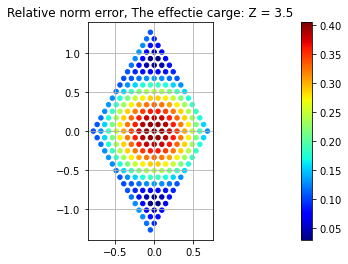

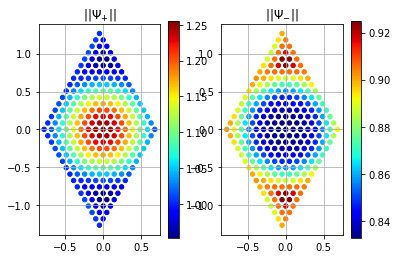

In [15]:
Z = 3.5
get_phiAO = AtomicOrbital.get_2pz
N2belarge = 4
RA = np.array([(np.sqrt(3.0)*a)/3.0, 0.0, 0.0])
RB = np.array([2.0*(np.sqrt(3.0)*a)/3.0, 0.0, 0.0])
gamma = -3.033/Hartree2eV
s = 0.129
#
k_list = []
normkplus_list = []
normkminus_list = []
N1k = 16
N2k = 16
for i1 in range(N1k):
    for i2 in range(N2k):
        k = (i1/N1k - 1/2)*b1 + (i2/N2k - 1/2)*b2
        #k = (i1/N1k)*b1 + (i2/N2k)*b2 
        k_list.append(k)
k_array = np.array(k_list)
#
nk = 0
for k in k_list:
      #print(k)
    if (nk%50 ==0):
        print(str(nk)+"/"+str(len(k_list))+" is finished.")
    f, epsplus, epsminus, cAplus, cBplus, cAminus, cBminus = k2fepscAcB(k, a1, a2, RA[:2], RB[:2], gamma, s)
    f_list.append(f)
    phinkA, N1, N2 = get_phink(r, RA, Z, k, get_phiAO, N1=N2belarge, N2=N2belarge)
    phinkB, N1, N2 = get_phink(r, RB, Z, k, get_phiAO, N1=N2belarge, N2=N2belarge)
    psikplus = cAplus*phinkA + cBplus*phinkB
    psikminus = cAminus*phinkA + cBminus*phinkB
    normkplus = np.sum((np.abs(psikplus))**2)*dV*(N1*N2)
    normkminus = np.sum((np.abs(psikminus))**2)*dV*(N1*N2)
    #print('The norms of psikplus, and psikminus orbital', normkplus, normkminus, (normkplus - normkminus)/(normkplus + normkminus)*2.0)
    normkplus_list.append(normkplus)
    normkminus_list.append(normkminus)
    nk += 1
normkplus_array = np.array(normkplus_list)
normkminus_array = np.array(normkminus_list)
print("Averaged norm for $||\Psi_{+}||$: ",np.sum(normkplus_array)/(N1k*N2k))
print("Averaged norm for $||\Psi_{-}||$: ",np.sum(normkminus_array)/(N1k*N2k))
#
#
plt.figure()
plt.title('Relative norm error, The effectie carge: Z = '+str(Z))
plt.scatter(k_array[:,0], k_array[:,1], s = 5000.0/(N1k*N2k), c=(normkplus_array - normkminus_array)/(normkplus_array + normkminus_array)*2.0, cmap=plt.cm.jet)
plt.grid()
plt.colorbar()
plt.axis('scaled')
plt.show()
#
plt.figure()
##
plt.subplot(121)
plt.title('$||\Psi_{+}||$')
plt.scatter(k_array[:,0], k_array[:,1], s = 5000.0/(N1k*N2k), c=normkplus_array, cmap=plt.cm.jet)
plt.grid()
plt.colorbar()
plt.axis('scaled')
##
plt.subplot(122)
plt.title('$||\Psi_{-}||$')
plt.scatter(k_array[:,0], k_array[:,1], s = 5000.0/(N1k*N2k), c=normkminus_array, cmap=plt.cm.jet)
plt.grid()
plt.colorbar()
plt.axis('scaled')
##
plt.show()

0/256 is finished.
50/256 is finished.
100/256 is finished.
150/256 is finished.
200/256 is finished.
250/256 is finished.
Averaged norm for $||\Psi_{+}||$:  1.1461947145008236
Averaged norm for $||\Psi_{-}||$:  0.7509689908150015


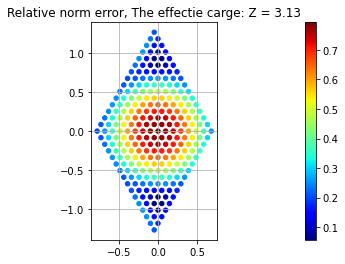

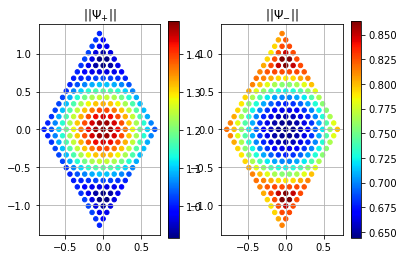

In [16]:
Z = 3.13
get_phiAO = AtomicOrbital.get_2pz
N2belarge = 4
RA = np.array([(np.sqrt(3.0)*a)/3.0, 0.0, 0.0])
RB = np.array([2.0*(np.sqrt(3.0)*a)/3.0, 0.0, 0.0])
gamma = -3.033/Hartree2eV
s = 0.129
#
k_list = []
normkplus_list = []
normkminus_list = []
N1k = 16
N2k = 16
for i1 in range(N1k):
    for i2 in range(N2k):
        k = (i1/N1k - 1/2)*b1 + (i2/N2k - 1/2)*b2
        #k = (i1/N1k)*b1 + (i2/N2k)*b2 
        k_list.append(k)
k_array = np.array(k_list)
#
nk = 0
for k in k_list:
      #print(k)
    if (nk%50 ==0):
        print(str(nk)+"/"+str(len(k_list))+" is finished.")
    f, epsplus, epsminus, cAplus, cBplus, cAminus, cBminus = k2fepscAcB(k, a1, a2, RA[:2], RB[:2], gamma, s)
    f_list.append(f)
    phinkA, N1, N2 = get_phink(r, RA, Z, k, get_phiAO, N1=N2belarge, N2=N2belarge)
    phinkB, N1, N2 = get_phink(r, RB, Z, k, get_phiAO, N1=N2belarge, N2=N2belarge)
    psikplus = cAplus*phinkA + cBplus*phinkB
    psikminus = cAminus*phinkA + cBminus*phinkB
    normkplus = np.sum((np.abs(psikplus))**2)*dV*(N1*N2)
    normkminus = np.sum((np.abs(psikminus))**2)*dV*(N1*N2)
    #print('The norms of psikplus, and psikminus orbital', normkplus, normkminus, (normkplus - normkminus)/(normkplus + normkminus)*2.0)
    normkplus_list.append(normkplus)
    normkminus_list.append(normkminus)
    nk += 1
normkplus_array = np.array(normkplus_list)
normkminus_array = np.array(normkminus_list)
print("Averaged norm for $||\Psi_{+}||$: ",np.sum(normkplus_array)/(N1k*N2k))
print("Averaged norm for $||\Psi_{-}||$: ",np.sum(normkminus_array)/(N1k*N2k))
#
#
plt.figure()
plt.title('Relative norm error, The effectie carge: Z = '+str(Z))
plt.scatter(k_array[:,0], k_array[:,1], s = 5000.0/(N1k*N2k), c=(normkplus_array - normkminus_array)/(normkplus_array + normkminus_array)*2.0, cmap=plt.cm.jet)
plt.grid()
plt.colorbar()
plt.axis('scaled')
plt.show()
#
plt.figure()
##
plt.subplot(121)
plt.title('$||\Psi_{+}||$')
plt.scatter(k_array[:,0], k_array[:,1], s = 5000.0/(N1k*N2k), c=normkplus_array, cmap=plt.cm.jet)
plt.grid()
plt.colorbar()
plt.axis('scaled')
##
plt.subplot(122)
plt.title('$||\Psi_{-}||$')
plt.scatter(k_array[:,0], k_array[:,1], s = 5000.0/(N1k*N2k), c=normkminus_array, cmap=plt.cm.jet)
plt.grid()
plt.colorbar()
plt.axis('scaled')
##
plt.show()

0/256 is finished.
50/256 is finished.
100/256 is finished.
150/256 is finished.
200/256 is finished.
250/256 is finished.
Averaged norm for $||\Psi_{+}||$:  1.173158650554071
Averaged norm for $||\Psi_{-}||$:  0.7034704554252282


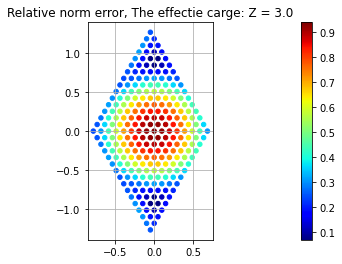

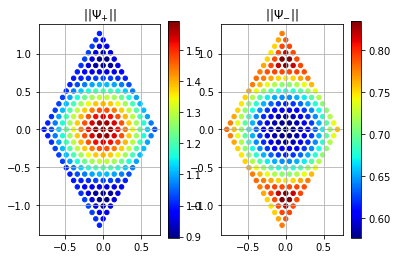

In [17]:
Z = 3.0
get_phiAO = AtomicOrbital.get_2pz
N2belarge = 4
RA = np.array([(np.sqrt(3.0)*a)/3.0, 0.0, 0.0])
RB = np.array([2.0*(np.sqrt(3.0)*a)/3.0, 0.0, 0.0])
gamma = -3.033/Hartree2eV
s = 0.129
#
k_list = []
normkplus_list = []
normkminus_list = []
N1k = 16
N2k = 16
for i1 in range(N1k):
    for i2 in range(N2k):
        k = (i1/N1k - 1/2)*b1 + (i2/N2k - 1/2)*b2
        #k = (i1/N1k)*b1 + (i2/N2k)*b2 
        k_list.append(k)
k_array = np.array(k_list)
#
nk = 0
for k in k_list:
      #print(k)
    if (nk%50 ==0):
        print(str(nk)+"/"+str(len(k_list))+" is finished.")
    f, epsplus, epsminus, cAplus, cBplus, cAminus, cBminus = k2fepscAcB(k, a1, a2, RA[:2], RB[:2], gamma, s)
    f_list.append(f)
    phinkA, N1, N2 = get_phink(r, RA, Z, k, get_phiAO, N1=N2belarge, N2=N2belarge)
    phinkB, N1, N2 = get_phink(r, RB, Z, k, get_phiAO, N1=N2belarge, N2=N2belarge)
    psikplus = cAplus*phinkA + cBplus*phinkB
    psikminus = cAminus*phinkA + cBminus*phinkB
    normkplus = np.sum((np.abs(psikplus))**2)*dV*(N1*N2)
    normkminus = np.sum((np.abs(psikminus))**2)*dV*(N1*N2)
    #print('The norms of psikplus, and psikminus orbital', normkplus, normkminus, (normkplus - normkminus)/(normkplus + normkminus)*2.0)
    normkplus_list.append(normkplus)
    normkminus_list.append(normkminus)
    nk += 1
normkplus_array = np.array(normkplus_list)
normkminus_array = np.array(normkminus_list)
print("Averaged norm for $||\Psi_{+}||$: ",np.sum(normkplus_array)/(N1k*N2k))
print("Averaged norm for $||\Psi_{-}||$: ",np.sum(normkminus_array)/(N1k*N2k))
#
#
plt.figure()
plt.title('Relative norm error, The effectie carge: Z = '+str(Z))
plt.scatter(k_array[:,0], k_array[:,1], s = 5000.0/(N1k*N2k), c=(normkplus_array - normkminus_array)/(normkplus_array + normkminus_array)*2.0, cmap=plt.cm.jet)
plt.grid()
plt.colorbar()
plt.axis('scaled')
plt.show()
#
plt.figure()
##
plt.subplot(121)
plt.title('$||\Psi_{+}||$')
plt.scatter(k_array[:,0], k_array[:,1], s = 5000.0/(N1k*N2k), c=normkplus_array, cmap=plt.cm.jet)
plt.grid()
plt.colorbar()
plt.axis('scaled')
##
plt.subplot(122)
plt.title('$||\Psi_{-}||$')
plt.scatter(k_array[:,0], k_array[:,1], s = 5000.0/(N1k*N2k), c=normkminus_array, cmap=plt.cm.jet)
plt.grid()
plt.colorbar()
plt.axis('scaled')
##
plt.show()

0/256 is finished.
50/256 is finished.
100/256 is finished.
150/256 is finished.
200/256 is finished.
250/256 is finished.
Averaged norm for $||\Psi_{+}||$:  0.9066880792258323
Averaged norm for $||\Psi_{-}||$:  1.1554753024222388


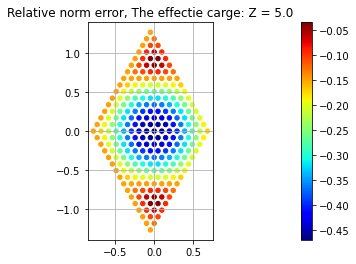

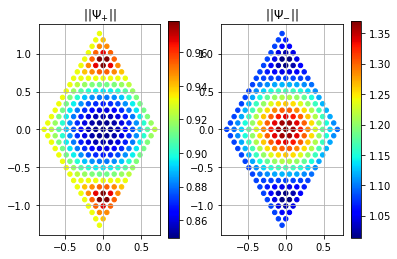

In [18]:
Z = 5.0
get_phiAO = AtomicOrbital.get_2pz
N2belarge = 4
RA = np.array([(np.sqrt(3.0)*a)/3.0, 0.0, 0.0])
RB = np.array([2.0*(np.sqrt(3.0)*a)/3.0, 0.0, 0.0])
gamma = -3.033/Hartree2eV
s = 0.129
#
k_list = []
normkplus_list = []
normkminus_list = []
N1k = 16
N2k = 16
for i1 in range(N1k):
    for i2 in range(N2k):
        k = (i1/N1k - 1/2)*b1 + (i2/N2k - 1/2)*b2
        #k = (i1/N1k)*b1 + (i2/N2k)*b2 
        k_list.append(k)
k_array = np.array(k_list)
#
nk = 0
for k in k_list:
      #print(k)
    if (nk%50 ==0):
        print(str(nk)+"/"+str(len(k_list))+" is finished.")
    f, epsplus, epsminus, cAplus, cBplus, cAminus, cBminus = k2fepscAcB(k, a1, a2, RA[:2], RB[:2], gamma, s)
    f_list.append(f)
    phinkA, N1, N2 = get_phink(r, RA, Z, k, get_phiAO, N1=N2belarge, N2=N2belarge)
    phinkB, N1, N2 = get_phink(r, RB, Z, k, get_phiAO, N1=N2belarge, N2=N2belarge)
    psikplus = cAplus*phinkA + cBplus*phinkB
    psikminus = cAminus*phinkA + cBminus*phinkB
    normkplus = np.sum((np.abs(psikplus))**2)*dV*(N1*N2)
    normkminus = np.sum((np.abs(psikminus))**2)*dV*(N1*N2)
    #print('The norms of psikplus, and psikminus orbital', normkplus, normkminus, (normkplus - normkminus)/(normkplus + normkminus)*2.0)
    normkplus_list.append(normkplus)
    normkminus_list.append(normkminus)
    nk += 1
normkplus_array = np.array(normkplus_list)
normkminus_array = np.array(normkminus_list)
print("Averaged norm for $||\Psi_{+}||$: ",np.sum(normkplus_array)/(N1k*N2k))
print("Averaged norm for $||\Psi_{-}||$: ",np.sum(normkminus_array)/(N1k*N2k))
#
#
plt.figure()
plt.title('Relative norm error, The effectie carge: Z = '+str(Z))
plt.scatter(k_array[:,0], k_array[:,1], s = 5000.0/(N1k*N2k), c=(normkplus_array - normkminus_array)/(normkplus_array + normkminus_array)*2.0, cmap=plt.cm.jet)
plt.grid()
plt.colorbar()
plt.axis('scaled')
plt.show()
#
plt.figure()
##
plt.subplot(121)
plt.title('$||\Psi_{+}||$')
plt.scatter(k_array[:,0], k_array[:,1], s = 5000.0/(N1k*N2k), c=normkplus_array, cmap=plt.cm.jet)
plt.grid()
plt.colorbar()
plt.axis('scaled')
##
plt.subplot(122)
plt.title('$||\Psi_{-}||$')
plt.scatter(k_array[:,0], k_array[:,1], s = 5000.0/(N1k*N2k), c=normkminus_array, cmap=plt.cm.jet)
plt.grid()
plt.colorbar()
plt.axis('scaled')
##
plt.show()

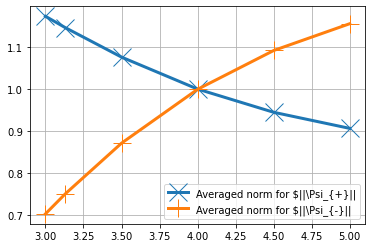

In [19]:
Z_list = []
normplus_list = []
normminus_list = []
# Z = 3.0
Z_list.append(3.0)
normplus_list.append(1.173158650554071)
normminus_list.append(0.7034704554252282)
# Z = 3.13
Z_list.append(3.13)
normplus_list.append(1.1461947145008236)
normminus_list.append(0.7509689908150015)
# Z = 3.5
Z_list.append(3.5)
normplus_list.append(1.076086062106706)
normminus_list.append(0.8715312462142257)
# Z = 4.0
Z_list.append(4.0)
normplus_list.append(1.000099150241307)
normminus_list.append(0.9995769089392696)
# Z = 4.5
Z_list.append(4.5)
normplus_list.append(0.9449245294354948)
normminus_list.append(1.0917630246064733)
# Z = 5.0
Z_list.append(5.0)
normplus_list.append(0.9066880792258323)
normminus_list.append(1.1554753024222388)

plt.figure()
plt.plot(Z_list, normplus_list,'x-',lw=3.0, ms=18.0, label="Averaged norm for $||\Psi_{+}||")
plt.plot(Z_list, normminus_list,'+-',lw=3.0, ms=18.0, label="Averaged norm for $||\Psi_{-}||") 
plt.grid()
plt.legend()
plt.show() 